In [111]:
%matplotlib inline 

In [335]:
import os, shutil
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from seaborn import despine
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.multiclass import type_of_target
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [113]:
#loading the dataset
url = 'https://raw.githubusercontent.com/mn20781/auditing/main/audit_risk.csv'
url0 = 'https://raw.githubusercontent.com/mn20781/auditing/main/trial.csv'
#reading the data as a csv and storing dataframe in 'data' variable. 
risk = pd.read_csv(url, header=0,skiprows=0, delimiter = ',')  
trial = pd.read_csv(url, header=0,skiprows=0, delimiter = ',')  

In [114]:
def load_data(url):
    'Takes a url and stores it as a pandas dataset'
    variable_name = input('Set dataset Name : ', )
    vars()[variable_name] = pd.read_csv(url, header=0,skiprows=0, delimiter = ',')
    return 

In [115]:
#load_data('https://raw.githubusercontent.com/mn20781/auditing/main/audit_risk.csv')

In [366]:
trial.shape

(776, 27)

In [117]:
#prints the info of the dataset which include its shape and no of examples and its type
def datainfo(data):
    'Input is a pandas dataset'
    
    print('No. of examples :', len(data))
    print('Dataframe shape :', data.shape)
    print('Type :', type(data))
    print('Columns :', data.columns)
    return


In [118]:
datainfo(risk)

No. of examples : 776
Dataframe shape : (776, 27)
Type : <class 'pandas.core.frame.DataFrame'>
Columns : Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')


In [119]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [120]:
#trial[['LOCATION_ID']].value_counts

In [121]:
trial.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [122]:
trial.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [123]:
#audit risk is a feature of importance, so we check what the max input is for this predictor is
#trial[['Audit_Risk']].max()

In [368]:
trial['LOCATION_ID'].value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64

In [124]:
#Looking at the values of historical data of firms 
trial[['Sector_score']].value_counts()

Sector_score
55.57           200
3.89            114
1.85             95
2.72             82
3.41             76
2.37             74
1.99             47
21.61            41
59.85            37
2.34              5
15.56             3
2.36              1
17.68             1
dtype: int64

array([[<AxesSubplot: title={'center': 'Sector_score'}>]], dtype=object)

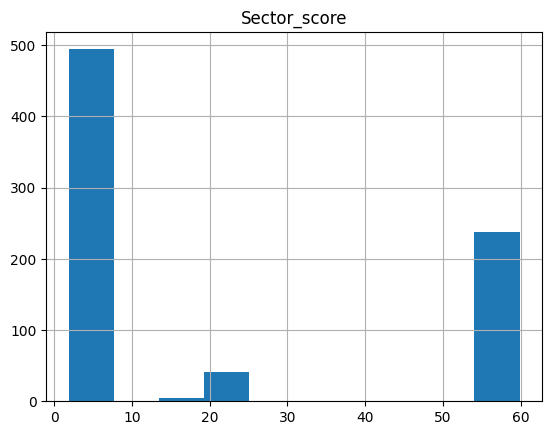

In [125]:
trial[['Sector_score']].hist()

In [126]:
#view a randomised sample of the data
trial[['Audit_Risk']].min()

Audit_Risk    0.28
dtype: float64

In [127]:
trial.isnull().any() #check to see if there are any missing values in trial database

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [128]:
risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [129]:
risk['Audit_Risk'].isnull().any() #no missing values in Audit Risk 

False

In [130]:
risk[::1]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [131]:
risktrial['Risk']==1

NameError: name 'risktrial' is not defined

In [132]:
y = trial['Risk']

In [133]:
type(y)

pandas.core.series.Series

In [134]:
type_of_target(y)

'binary'

In [135]:
#check the datatypes of the features in the data
risk.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [136]:
risk['LOCATION_ID'].sample(5)

460    14
26      4
219    22
569    21
451    43
Name: LOCATION_ID, dtype: object

In [137]:
#features_drop = ['LOCATION_ID', 'Money_Value']
#numeric = ['Audit_Risk']

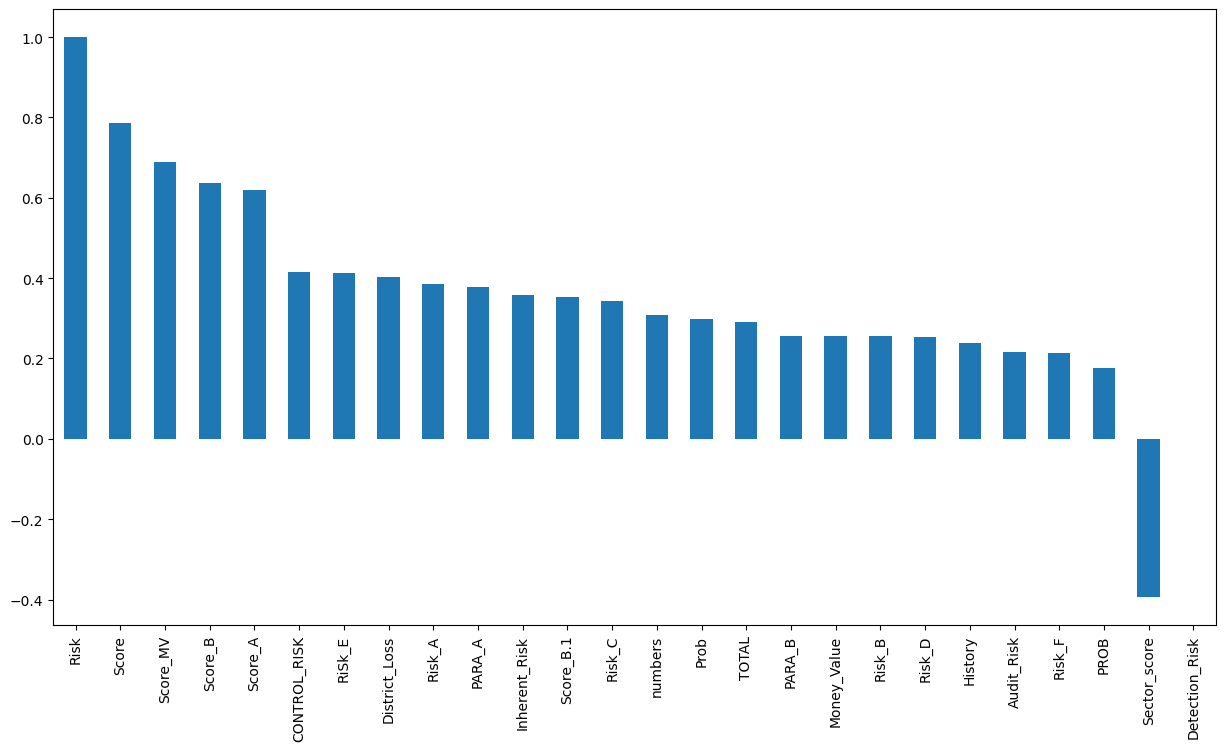

In [371]:
#correlation matrix of numerical features
plt.figure(figsize=(15,8))
corr_matrix = trial.corr(numeric_only=True)
corr_matrix['Risk'].sort_values(ascending=False).plot(kind='bar')
plt.savefig('corr_matrix.jpg')

In [139]:
corr_matrix['Risk'].sort_values(ascending=False)

Risk              1.000000
Score             0.785995
Score_MV          0.688367
Score_B           0.635768
Score_A           0.619726
CONTROL_RISK      0.416474
RiSk_E            0.411803
District_Loss     0.403806
Risk_A            0.385067
PARA_A            0.378758
Inherent_Risk     0.357020
Score_B.1         0.353803
Risk_C            0.342140
numbers           0.308141
Prob              0.298639
TOTAL             0.292022
PARA_B            0.257029
Money_Value       0.256992
Risk_B            0.255286
Risk_D            0.254355
History           0.239453
Audit_Risk        0.217113
Risk_F            0.214511
PROB              0.176912
Sector_score     -0.394131
Detection_Risk         NaN
Name: Risk, dtype: float64

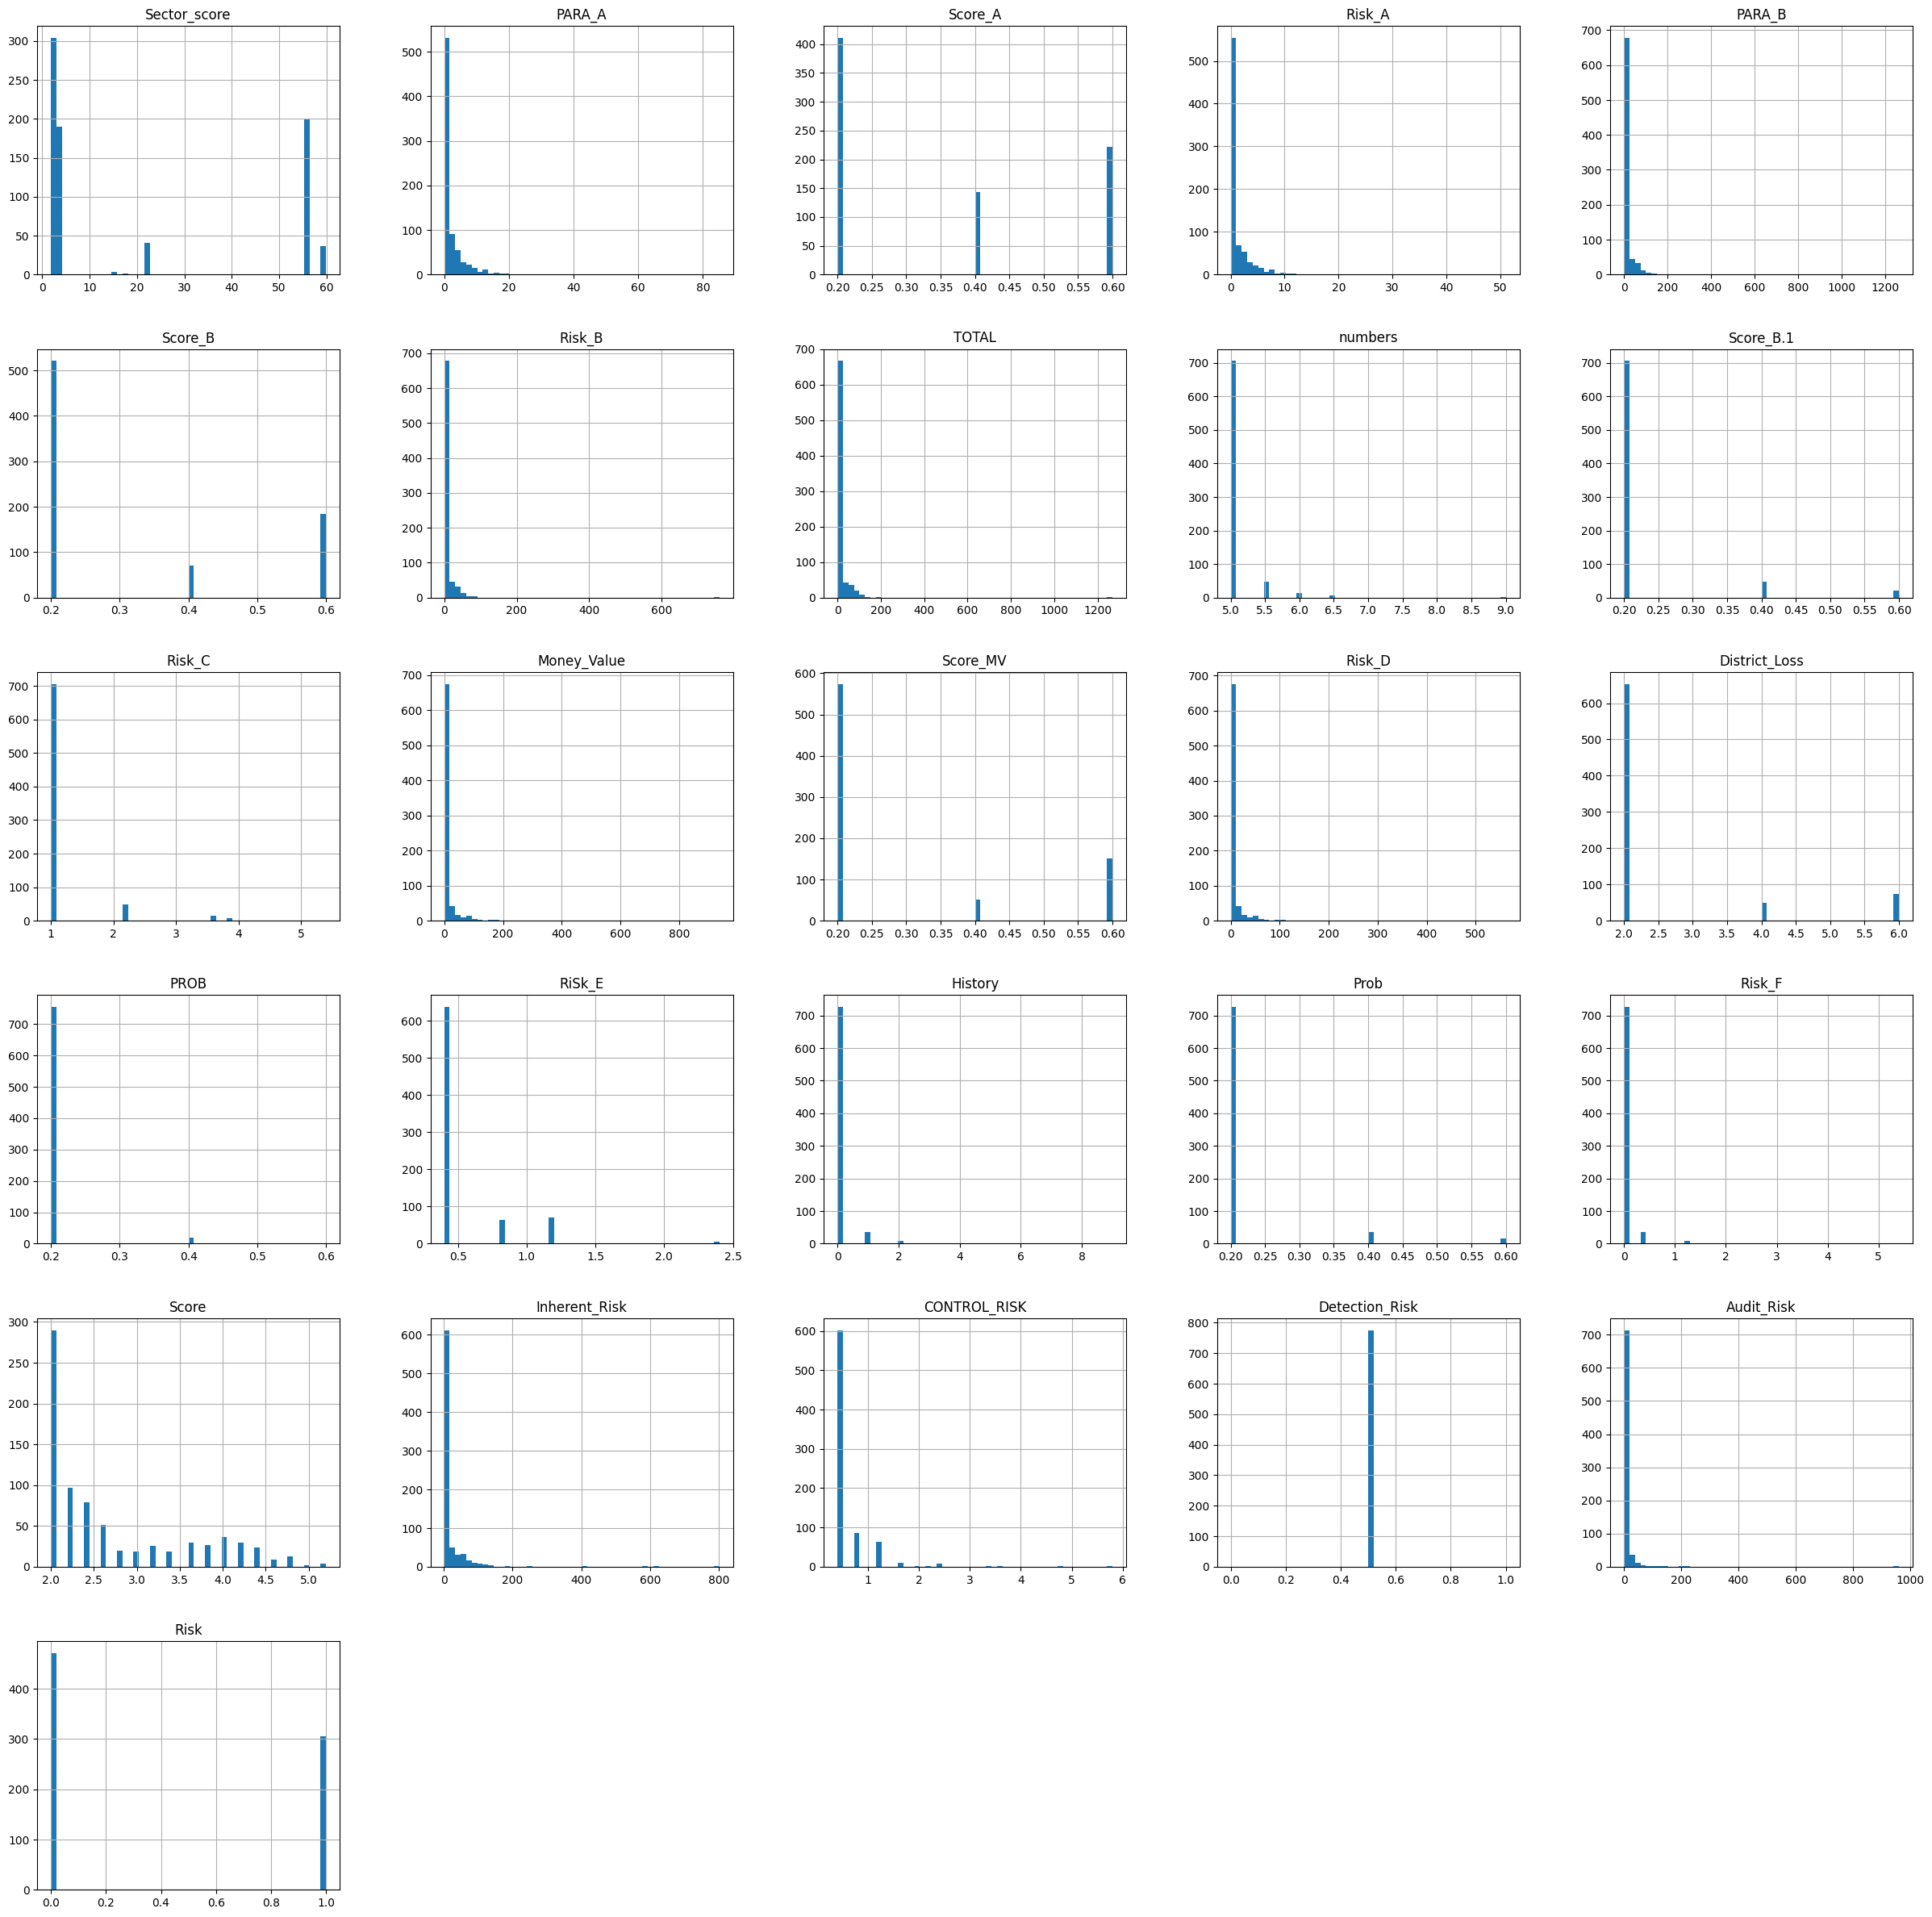

<Figure size 640x480 with 0 Axes>

In [422]:
trial.hist(bins=50, figsize=(30,30)) #histogram showing the distribution of values 
plt.show()
plt.savefig('hist.jpg')

In [141]:
datainfo(trial)

No. of examples : 776
Dataframe shape : (776, 27)
Type : <class 'pandas.core.frame.DataFrame'>
Columns : Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')


In [142]:
trial.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [374]:
trial['Audit_Risk'].describe()

count    776.000000
mean       7.168158
std       38.667494
min        0.280000
25%        0.316700
50%        0.555600
75%        3.249900
max      961.514400
Name: Audit_Risk, dtype: float64

In [378]:
trial['Score'].describe()

count    776.000000
mean       2.702577
std        0.858923
min        2.000000
25%        2.000000
50%        2.400000
75%        3.250000
max        5.200000
Name: Score, dtype: float64

In [379]:
trial['Inherent_Risk'].describe()

count    776.000000
mean      17.680612
std       54.740244
min        1.400000
25%        1.583500
50%        2.214000
75%       10.663500
max      801.262000
Name: Inherent_Risk, dtype: float64

In [380]:
trial['Risk_D'].describe()

count    776.000000
mean       8.265434
std       39.970849
min        0.000000
25%        0.000000
50%        0.018000
75%        2.235000
max      561.018000
Name: Risk_D, dtype: float64

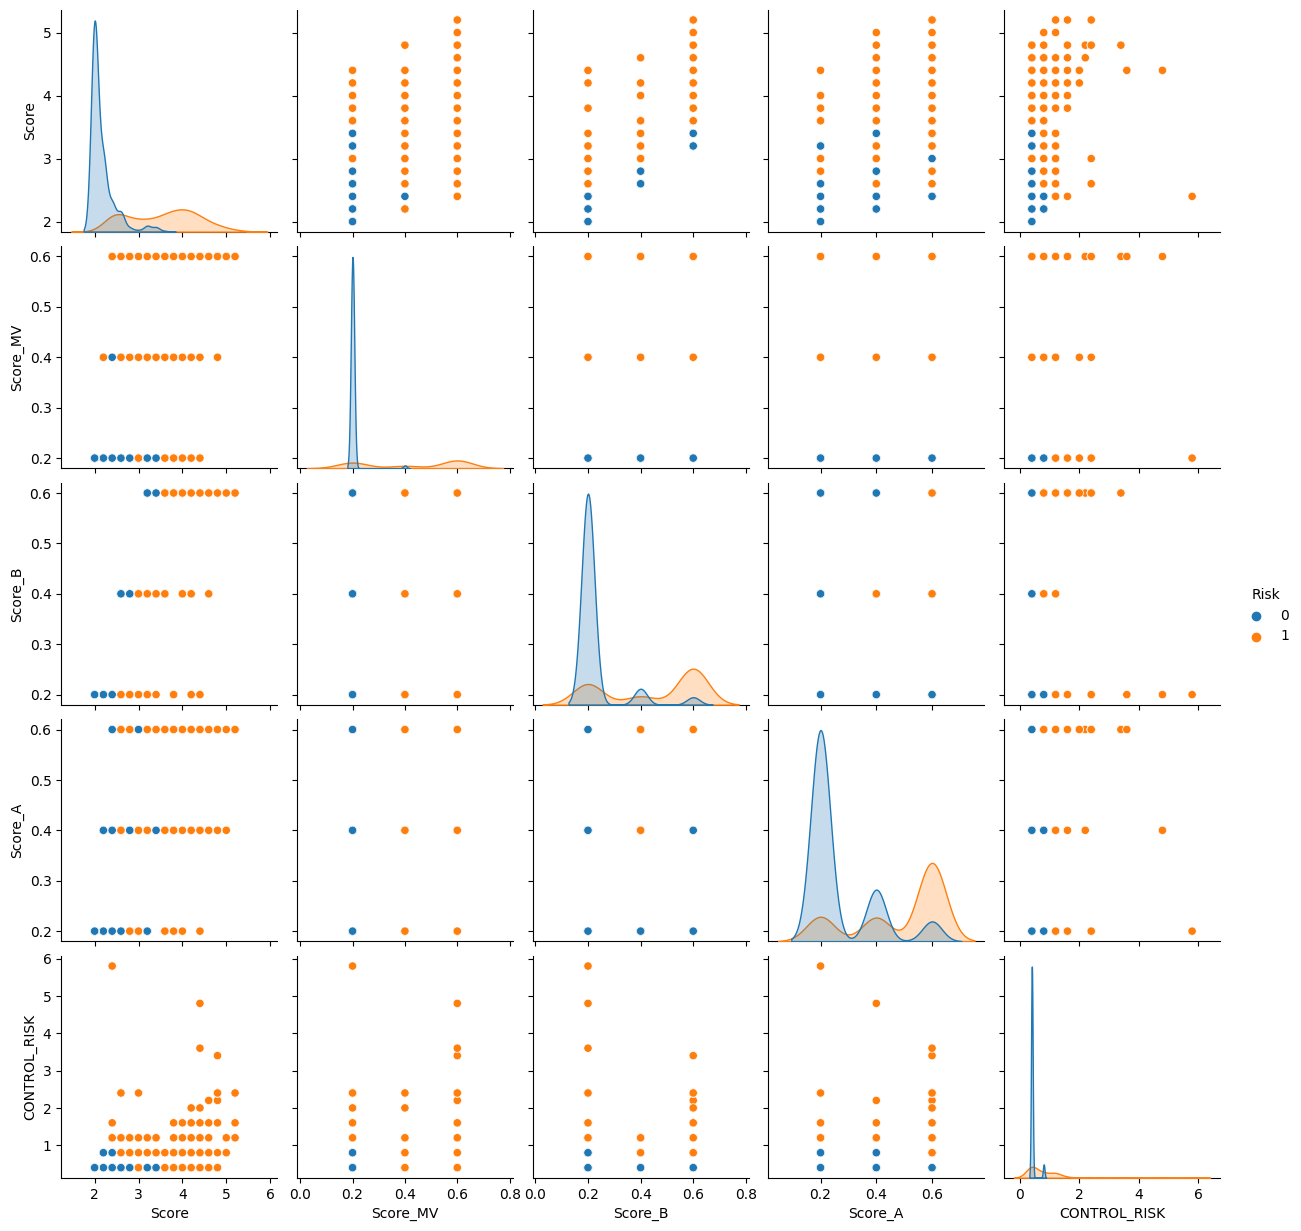

In [381]:
#create pairplot to visualise variable distribution and relationships
sns.pairplot(trial, vars=(['Score', 'Score_MV', 'Score_B', 'Score_A', 'CONTROL_RISK']),
            hue='Risk')
plt.savefig('pairplot.jpg')

<Figure size 640x480 with 0 Axes>

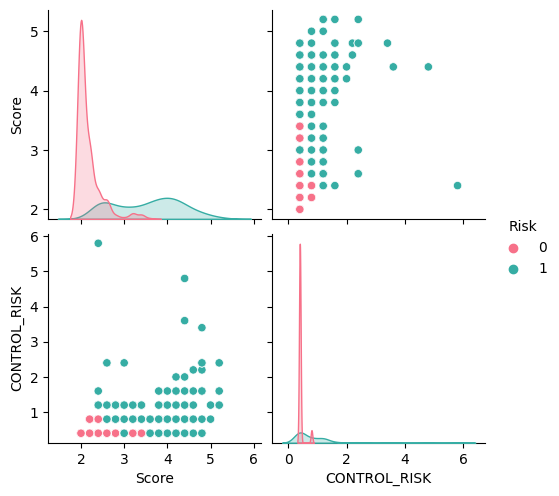

<Figure size 640x480 with 0 Axes>

In [382]:
sns.pairplot(trial, vars=(['Score', 'CONTROL_RISK']),
             kind='scatter', hue='Risk', palette='husl')
plt.figure('pairplotScore.jpg')

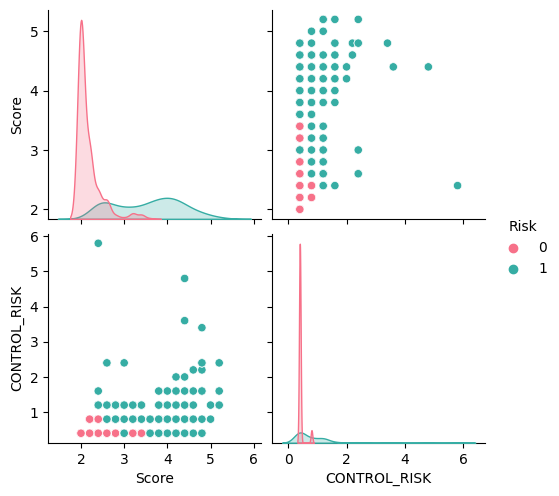

In [145]:
sns.pairplot(trial, vars=(['Score', 'CONTROL_RISK']),
             kind='scatter', hue='Risk', palette='husl')

<AxesSubplot: >

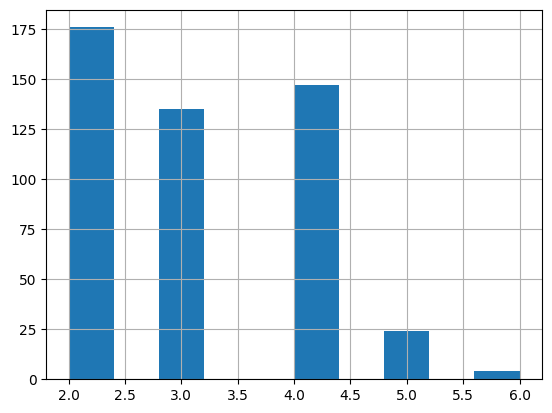

In [146]:
trial['Score Cat'] = pd.cut(trial["Score"], bins=[2.0, 2.5, 3.5, 4.5, 5., np.inf], 
               labels=[2, 3, 4, 5, 6])
trial['Score Cat'].hist()


In [147]:
trial['Score Cat'].value_counts()

2    176
4    147
3    135
5     24
6      4
Name: Score Cat, dtype: int64

In [148]:
trial['Score_A'].value_counts()

0.2    411
0.6    222
0.4    143
Name: Score_A, dtype: int64

In [149]:
trial['Score_MV'].value_counts()

0.2    574
0.6    151
0.4     51
Name: Score_MV, dtype: int64

In [150]:
trial['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [151]:
#check the dimensions of the dataset 
trial.ndim

2

In [152]:
riskyes = trial.loc[trial['Risk']==1]#checking to see the values that are 1

In [153]:
riskno = trial.loc[trial['Risk']==0]#check to see the values of risk in class 0

In [154]:
print(f'There are {len(riskyes)} examples of at risk firms in the dataset')
print(f'There are {len(riskno)} examples of non-risk firms in the dataset')

There are 305 examples of at risk firms in the dataset
There are 471 examples of non-risk firms in the dataset


In [383]:
#print(len(riskyes)+len(riskno))

In [155]:
riskyes.describe()#check randomised sample of the dataset of risky firms 

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.0
mean,8.281246,5.121379,0.485246,2.996276,26.786689,0.447213,15.868164,31.827412,5.168852,0.259016,...,0.667541,0.262295,0.241967,0.135082,3.540984,41.951181,0.802623,0.5,17.594018,1.0
std,15.662242,8.317627,0.159188,5.027502,77.271891,0.181007,46.421837,78.341559,0.399647,0.118900,...,0.406237,0.821216,0.102963,0.476399,0.770291,81.635951,0.634527,0.0,60.265935,0.0
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.200000,2.200000,0.400000,0.5,1.014400,1.0
25%,2.370000,1.190000,0.400000,0.476000,0.830000,0.200000,0.166000,3.530000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.800000,7.264000,0.400000,0.5,1.907600,1.0
50%,3.410000,3.080000,0.600000,1.848000,7.630000,0.600000,3.604000,11.990000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.600000,19.372000,0.400000,0.5,5.389600,1.0
75%,3.890000,6.470000,0.600000,3.882000,38.320000,0.600000,22.992000,45.050000,5.000000,0.200000,...,0.800000,0.000000,0.200000,0.000000,4.200000,52.758000,1.200000,0.5,15.683200,1.0
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.0


In [156]:
null_mv = trial.loc[risk['Money_Value']==0] #checking to see the no of null values  

In [157]:
print(f'There are {len(null_mv)} null values in the Money Value feature' )

There are 332 null values in the Money Value feature


In [158]:
trial = trial.drop(columns=['Score Cat'])

In [159]:
trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [160]:
#risk['Money_Value'].sample(5) #viewing the money_value column data

In [161]:
#split data into test and training sets
train_set, test_set = train_test_split(trial, test_size=0.2,random_state=42)

In [384]:
#check the shape of the training set after splitting 
print(train_set.shape)
print(len(train_set))

(620, 27)
620


In [385]:
print(test_set.shape)
print(len(test_set))

(156, 27)
156


In [163]:
trial_train= train_set.copy()

In [164]:
datainfo(trial_train)

No. of examples : 620
Dataframe shape : (620, 27)
Type : <class 'pandas.core.frame.DataFrame'>
Columns : Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')


<AxesSubplot: xlabel='District_Loss', ylabel='Score'>

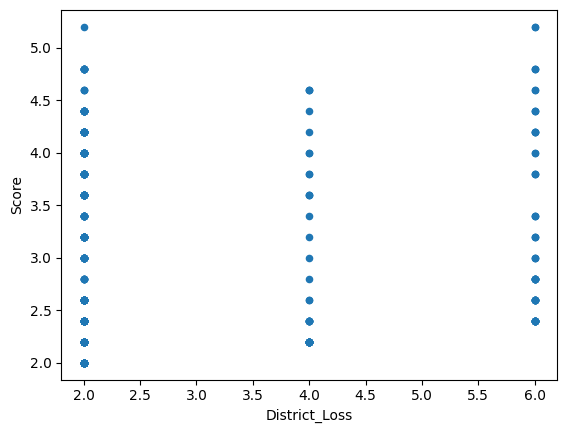

In [165]:
#plotting District_Loss against Score
trial_train.plot(kind='scatter', x='District_Loss', y='Score')

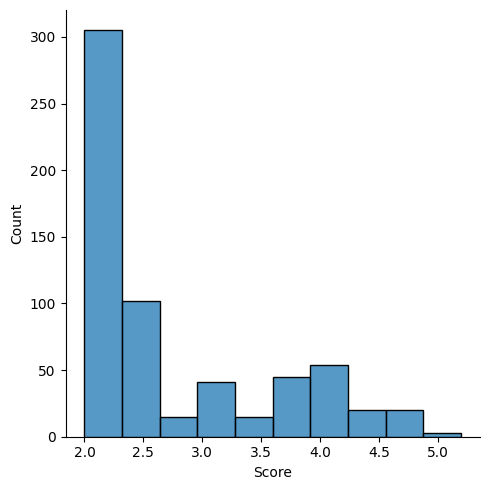

In [166]:
#The distribution of the Score feature 
sns.displot(trial_train, x ='Score', bins =10)

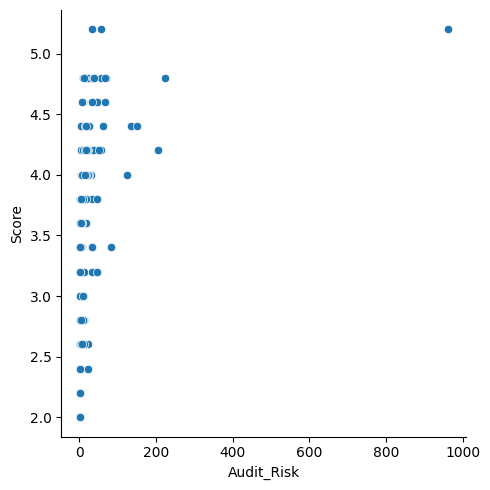

In [167]:
sns.relplot(data=trial_train, x='Audit_Risk', y ='Score')

In [168]:
trial_train['Audit_Risk'].describe()

count    620.000000
mean       7.655407
std       42.533973
min        0.280000
25%        0.317200
50%        0.630800
75%        3.531400
max      961.514400
Name: Audit_Risk, dtype: float64

<AxesSubplot: ylabel='Frequency'>

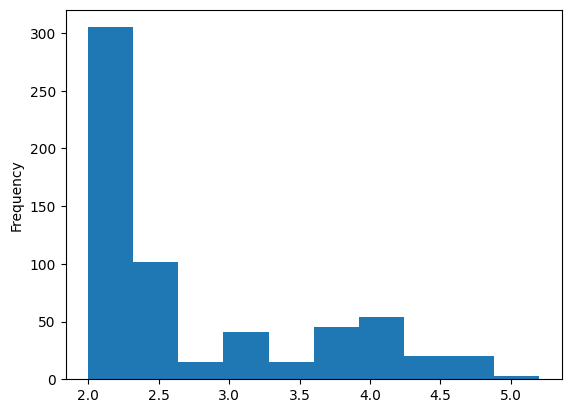

In [169]:
trial_train['Score'].plot(kind='hist')

In [170]:
#sns.countplot(trial_train['Score'])

<AxesSubplot: >

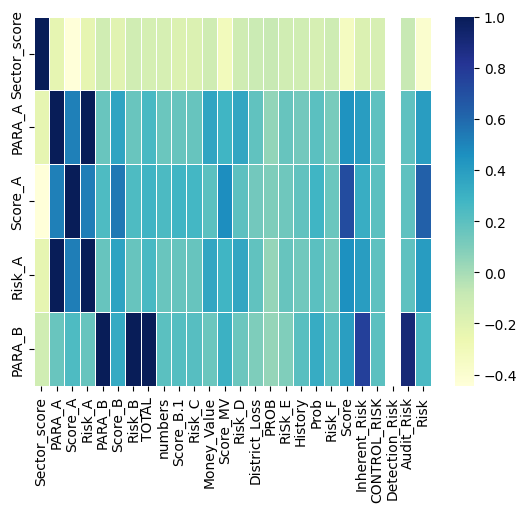

In [171]:
sns.heatmap(trial_train.corr(numeric_only=True).head(n=5), linewidths=.5, cmap='YlGnBu')

In [172]:
scaler = preprocessing.StandardScaler()

In [208]:
#create a pipeline to preprocess the data, for standardisation and dropping missing values 

features_drop = ['LOCATION_ID', 'Money_Value']
numeric_feats = ['Audit_Risk', 'Sector_score']


In [198]:
#print(numeric_vals.median().values)

In [199]:
#numeric_vals['Money_Value'].head(5)

In [200]:
numeric_vals.isnull().any()

Sector_score      False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [176]:
#risk['Money_Value'].hist(bins=50, figsize=(10,5))

In [177]:
#risk['Money_Value'].max()

In [178]:
#risk['Money_Value'].min()

In [179]:
#risk['Money_Value'].mean()

In [180]:
numeric_vals = numeric_vals.drop('Money_Value', axis=1)

In [201]:
numeric_vals.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [352]:
numeric_vals.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [205]:
y = trial_train['Risk']
x_data = numeric_vals.drop('Risk', axis=1)
#scaler = preprocessing.StandardScaler()
#x_standardised = scaler.fit_transform(x_data)

In [353]:
x_data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk'],
      dtype='object')

In [209]:
colTransformer = ColumnTransformer([('num', StandardScaler(), numeric_feats)],
                                  remainder='passthrough')
x_scaled = colTransformer.fit_transform(x_data)

In [234]:
x_scaled.ndim

2

In [211]:
#x_standardised

In [212]:
#get the random forest classifier 
clf = RandomForestClassifier()

In [213]:
skf = StratifiedKFold(n_splits=2)

In [351]:
#clf2 =  RandomForestClassifier(max_depth=4, random_state=0, n_jobs=-1)
def stratified_test(data, label):
    'This function takes data and label and fits a classifier'
    skf = StratifiedKFold(n_splits=2)
    scores=[]
    for train_index, test_index in skf.split(data, label):
        
    #print("TRAIN:", train_index, "TEST:", test_index)
        X_train = x_data.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = x_data.iloc[test_index]
        y_test = y.iloc[test_index]
        clf.fit(X_train,y_train)
        rfc_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        scores.append(score)
        print('Accuracy:',accuracy_score(y_test,rfc_pred))
        mean_score = np.mean(scores)
        print('The mean score of this classifier is:',mean_score)

In [215]:
#store the score values into a list and split the data into train_index and test_index using 
#stratified kfold and print the accuracy of the classifer 

scores=[]
for train_index, test_index in skf.split(x_scaled, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = x_data.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = x_data.iloc[test_index]
    y_test = y.iloc[test_index]
    clf.fit(X_train,y_train)
    rfc_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    scores.append(score)
    print('Accuracy:',accuracy_score(y_test,rfc_pred))
mean_score = np.mean(scores)
print('The mean score of this classifier is:',mean_score)

Accuracy: 1.0
Accuracy: 1.0
The mean score of this classifier is: 1.0


In [344]:
clf.feature_importances_

array([4.59741324e-03, 1.63133521e-02, 1.64238703e-02, 9.94554153e-03,
       5.71895899e-02, 1.33515211e-02, 6.65022164e-02, 9.28303683e-02,
       2.95598551e-06, 1.62414044e-03, 1.80848162e-03, 4.12819401e-02,
       7.55793445e-02, 2.28266421e-02, 2.24555033e-04, 3.19202128e-02,
       0.00000000e+00, 2.69179006e-04, 2.81327266e-06, 8.25071400e-02,
       1.25946624e-01, 3.25994158e-02, 0.00000000e+00, 3.06252683e-01])

In [345]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": clf.feature_importances_
})

In [346]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
23,Audit_Risk,0.306253
20,Inherent_Risk,0.125947
7,TOTAL,0.092830
19,Score,0.082507
12,Risk_D,0.075579
6,Risk_B,0.066502
4,PARA_B,0.057190
11,Score_MV,0.041282
21,CONTROL_RISK,0.032599
15,RiSk_E,0.031920


In [216]:
#check the f1 score metrics of our classifier 
f1 = f1_score(y_test, rfc_pred, average = 'micro')
print(f1)

1.0


In [217]:
#confusion matrix metrics 
confusion_matrix = confusion_matrix(y_test, rfc_pred)
confusion_matrix

array([[187,   0],
       [  0, 123]], dtype=int64)

In [227]:
pred_reshaped = rfc_pred.reshape(-1, 1)
#y_reshaped = y_test.reshape(-1, 1)


In [231]:
print(pred_reshaped.shape)
print(rfc_pred.shape)

(310, 1)
(310,)


In [239]:
#pred_reshaped

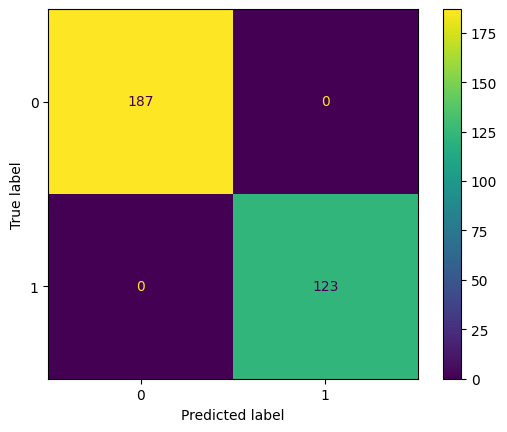

In [238]:
#plot confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred_reshaped)

In [240]:
#print(len(y_test))

In [241]:
#print(len(rfc_pred))

In [242]:
#type_of_target(y)

In [247]:
#getting the classifcation report of the model 
from sklearn.metrics import classification_report
target = ['0','1'] #specifying the target labels to look for 
print(classification_report(y_test, rfc_pred, target_names=target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       123

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [248]:
#risk['Risk'].value_counts()

In [249]:
#numeric_vals.pivot_table(index='Risk', aggfunc='size').plot(kind='bar')

In [250]:
#from matplotlib.pyplot import suptitle
#import seaborn as sns
#from seaborn import despine

#sns.set(style="whitegrid")

#ax=sns.countplot(x='Target',palette="Set3", data=data)
#ax.set_xticklabels(["Risk", 'No Risk'
#ax.set_ylabel("No ")
#ax.set_xlabel("Academic Progression")
#suptitle("Distribution of Risk")
#despine()

In [251]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train, cv =10)
print(y_train_pred, y_test)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0
 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 222    1
17     1
127    1
583    1
745    1
      ..
71     1
106    1
270    0
435    0
102    1
Name: Risk, Length: 310, dtype: int64


In [254]:
#show the current parameters of the random forest classifier 
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [289]:
#implement grid search CV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(cv=10, estimator=RandomForestClassifier (n_jobs=-1, random_state=42),
             n_jobs =-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         "min_samples_leaf": [5, 10, 20, 50, 100, 200],
                         "n_estimators": [10, 25,30, 50, 100, 200]},scoring= 'accuracy',
                         verbose=1, refit=False)



In [302]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             refit=False, scoring='accuracy', verbose=1)

In [303]:
grid_search.best_score_

1.0

In [268]:
#f#rom sklearn.model_selection import GridSearchCV

#grid_search = GridSearchCV(cv=10, estimator=RandomForestClassifier (n_jobs=-1, random_state=42),
 #            n_jobs =-1,
  #           param_grid={'max_depth': [2, 3, 5, 10, 20],
   #                      "min_samples_leaf": [5, 10, 20, 50, 100, 200],
    #                     "n_estimators": [10, 25,30, 50, 100, 200]},scoring= 'accuracy',
     #                    verbose=1)

In [297]:
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

In [298]:
#finding the best score 
#grid_search.best_score_

In [354]:
#rf_best = grid_search.best_estimator_
#rf_best

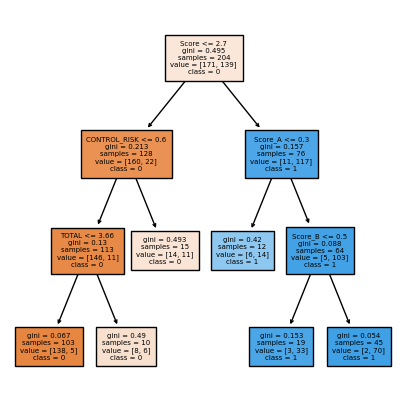

In [307]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(rf_best.estimators_[20], max_depth=5,
          feature_names = x_data.columns,class_names=['0', "1"],
          filled=True, fontsize=5);

In [308]:
rf_best.feature_importances_

array([8.95960518e-03, 1.44803767e-02, 1.51761816e-02, 5.27667797e-02,
       3.38955399e-02, 4.62679547e-05, 6.51862708e-02, 7.03275347e-02,
       0.00000000e+00, 0.00000000e+00, 3.75275763e-03, 2.26041981e-02,
       8.88658678e-02, 3.96414100e-03, 0.00000000e+00, 3.14301376e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27083634e-01,
       1.64159049e-01, 3.44893265e-02, 0.00000000e+00, 2.62812332e-01])

In [309]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [310]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
23,Audit_Risk,0.262812
20,Inherent_Risk,0.164159
19,Score,0.127084
12,Risk_D,0.088866
7,TOTAL,0.070328
6,Risk_B,0.065186
3,Risk_A,0.052767
21,CONTROL_RISK,0.034489
4,PARA_B,0.033896
15,RiSk_E,0.031430


In [342]:
grid_search.cv_results_

{'mean_fit_time': array([0.04669578, 0.09192483, 0.12229049, 0.18834045, 0.40141621,
        0.96504385, 0.0497854 , 0.10724857, 0.11256294, 0.17957284,
        0.43985238, 0.97179899, 0.05171711, 0.09974749, 0.10760722,
        0.19580789, 0.40868852, 0.83008378, 0.05022409, 0.10029943,
        0.10787644, 0.18823631, 0.39990451, 0.93956683, 0.04336469,
        0.09545701, 0.10381196, 0.15523922, 0.38910825, 0.84419193,
        0.05220847, 0.09193392, 0.09723182, 0.20759745, 0.3510319 ,
        0.87440829, 0.04976826, 0.09832015, 0.11353416, 0.20139484,
        0.48177516, 0.989305  , 0.05088837, 0.12839558, 0.11260195,
        0.23636606, 0.44199252, 1.07893336, 0.06175008, 0.10018711,
        0.1317956 , 0.194134  , 0.52375915, 1.088745  , 0.05954955,
        0.10658293, 0.13335056, 0.20971954, 0.50107751, 0.97930591,
        0.06346016, 0.14865856, 0.12179596, 0.20233102, 0.39434259,
        0.89084947, 0.05090764, 0.12055192, 0.12659588, 0.20226643,
        0.4208838 , 0.85066695,

In [311]:
y_pred_bestrfc = rf_best.predict(X_test)

In [312]:
print('Accuracy:',accuracy_score(y_test,y_pred_bestrfc))

Accuracy: 0.9967741935483871


In [313]:
from sklearn.metrics import confusion_matrix
confusion_matrix_gs = confusion_matrix(y_test, y_pred_bestrfc)
confusion_matrix_gs

array([[186,   1],
       [  0, 123]], dtype=int64)

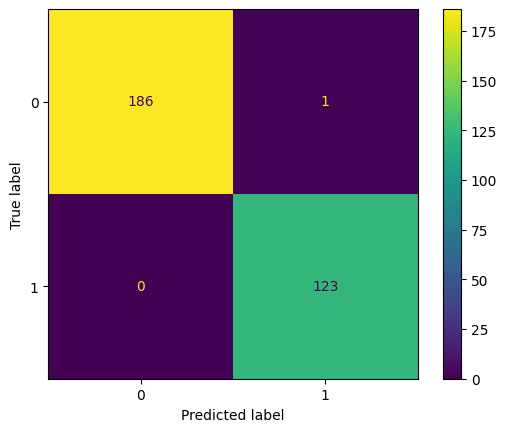

In [314]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bestrfc)

In [339]:
#cv = ShuffleSplit(n_split=5, test_size=0.3, random)
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cross_score = cross_val_score(rf_best, X_test, y_test, cv = 3, 
                              scoring='accuracy')
cross_score

array([1.        , 1.        , 0.99029126])

In [350]:
test_set.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [360]:
x_test_data = test_set.drop(columns=['LOCATION_ID','Money_Value', 'Risk'], axis=1)
y_test_set = test_set['Risk']

In [359]:
x_test_scaled = colTransformer.fit(x_test_data)

In [361]:
stratified_test(x_test_data, y_test_set)

Accuracy: 0.9871794871794872
The mean score of this classifier is: 0.9871794871794872
Accuracy: 0.9871794871794872
The mean score of this classifier is: 0.9871794871794872


In [388]:
print(classification_report(y_test, rfc_pred, target_names=target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       123

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [362]:
confusion_matrix = confusion_matrix(y_test, rfc_pred)
confusion_matrix

array([[187,   0],
       [  0, 123]], dtype=int64)

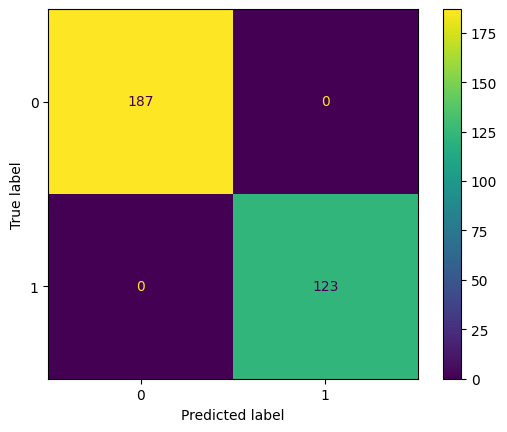

In [387]:
ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred)
plt.savefig('Confusion Matrix finalforest.jpg')

In [364]:
rf_final_cv_score = cross_val_score(clf, X_test, y_test, cv = 3, 
                              scoring='accuracy')
rf_final_cv_score

array([0.99038462, 1.        , 1.        ])

In [365]:
display_scores(rf_final_cv_score)

Scores: [0.99038462 1.         1.        ]
Mean: 0.9967948717948718
Standard deviation: 0.004532735776836827


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, log_pred)

In [322]:
#Logistics regression Model 
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [331]:
log_pred = log_clf.predict(X_test)

In [329]:
log_clf.predict_proba(X_test)

array([[6.87312115e-01, 3.12687885e-01],
       [3.67670339e-11, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.02138701e-08, 9.99999980e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99848872e-01, 1.51128174e-04],
       [9.99887191e-01, 1.12809457e-04],
       [9.99648543e-01, 3.51456783e-04],
       [9.98747298e-01, 1.25270167e-03],
       [9.99922550e-01, 7.74502275e-05],
       [9.98840340e-01, 1.15966025e-03],
       [9.99467359e-01, 5.32640950e-04],
       [9.99577263e-01, 4.22736774e-04],
       [6.21058124e-06, 9.99993789e-01],
       [7.47061017e-04, 9.99252939e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99719956e-01, 2.80043930e-04],
       [9.99922550e-01, 7.74502275e-05],
       [9.81437154e-14, 1.00000000e+00],
       [9.99669977e-01, 3.30022835e-04],
       [9.998617

In [332]:
print(classification_report(y_test, log_pred, target_names=target))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       187
           1       0.99      0.99      0.99       123

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



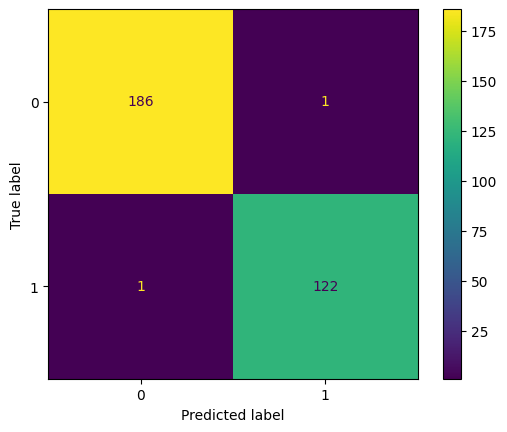

In [333]:
ConfusionMatrixDisplay.from_predictions(y_test, log_pred)

In [389]:
from sklearn.model_selection import cross_val_score


In [338]:
#roc_auc_score(y_test, log_clf.predict_proba(X_test))
cross_score = cross_val_score(log_clf, X_test, y_test, cv = 3, 
                              scoring='accuracy')
cross_score


array([0.99038462, 0.99029126, 0.99029126])

In [340]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    

In [341]:
display_scores(cross_score)

Scores: [1.         1.         0.99029126]
Mean: 0.9967637540453075
Standard deviation: 0.004576742920301277


In [408]:
#grid search for Logistic
lclf = LogisticRegression(solver='newton-cg',max_iter=1000)
grid_values = {'penalty':['l2'], 'C':[0.001, .009,0.01, .09,1, 5, 10, 25]}

In [409]:
grid_clf = GridSearchCV(lclf, param_grid=grid_values, scoring='recall')

In [410]:
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='newton-cg'),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l2']},
             scoring='recall')

In [411]:
#predict new values with new params
y_pred_logCV = grid_clf.predict(X_test)

In [420]:
y_pred_logCV

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [417]:
cross_score_grid = cross_val_score(grid_clf, X_test, y_test, cv = 3, 
                              scoring='accuracy')
cross_score_grid


array([0.99038462, 0.99029126, 0.99029126])

In [418]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [419]:
display_scores(cross_score_grid)

Scores: [0.99038462 0.99029126 0.99029126]
Mean: 0.9903223798854867
Standard deviation: 4.400714346444944e-05


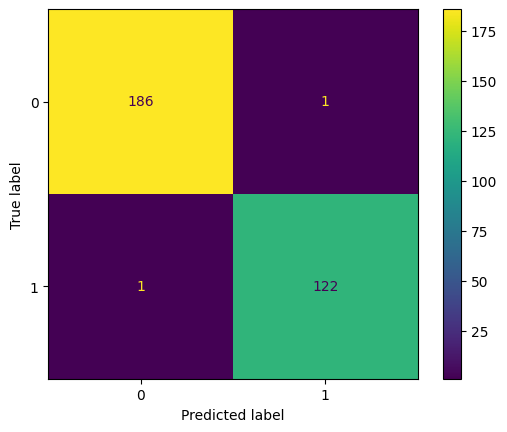

In [421]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logCV)

In [327]:

#y_proba = log_clf.predict_proba(X_test)
#plt.plot(X_new, y_proba[:, 1], "g-", label="Risk")
#plt.plot(X_new, y_proba[:, 1], "g-", label="Not Risk")

In [316]:
#ake it beautiful with a heatmap from the Seaborn library.

#import seaborn as sns
#sns.heatmap(confusion_matrix_gs, annot=True)

In [317]:
#from sklearn.model_selection import cross_val_score
#print(cross_val_score(rf_best, X=X_train, y=y_train, cv=5, 
 #                 scoring = 'accuracy'))
